In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
import warnings

<h2> Get Working Directory and Join CSV file for Pandas </h2>

In [2]:
pwd

'C:\\Users\\clyde\\Documents\\Thinkful\\Data Science Bootcamp\\Unit-3\\Lesson 5'

In [3]:
os.listdir()[12]

'Melbourne_housing_FULL.csv'

In [4]:
path = os.path.join(os.getcwd(),os.listdir()[12])

<h2> Read CSV File </h2>

In [5]:
df = pd.read_csv(path)

<h2> Examine Data Head </h2>

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


<h2> Check DataFrame Columns </h2>

In [7]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

<h2> Check DataFrame Data Types </h2>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

<h2> Check Data Fill Factor </h2>

In [9]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,BuildingArea,21115,39.423932
1,YearBuilt,19306,44.613707
2,Landsize,11810,66.118714
3,Car,8728,74.960553
4,Bathroom,8226,76.400723
5,Bedroom2,8217,76.426543
6,Longtitude,7976,77.117939
7,Lattitude,7976,77.117939
8,Price,7610,78.167943
9,CouncilArea,3,99.991393


<h1> Impute missing values </h1>

In [10]:
df_new = df.select_dtypes(exclude=['object'])

<h3> Exclude Object Data Type </h3>

In [11]:
df.select_dtypes(exclude=['object']).columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [12]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
df_new = my_imputer.fit_transform(df_new)

<h3> Convert Numpy Array back to DataFrame </h3>

In [50]:
df_new = pd.DataFrame(data=df_new,index = df.index,columns=df.select_dtypes(exclude=['object']).columns) 
df_new.head()
df_new.shape

(34857, 13)

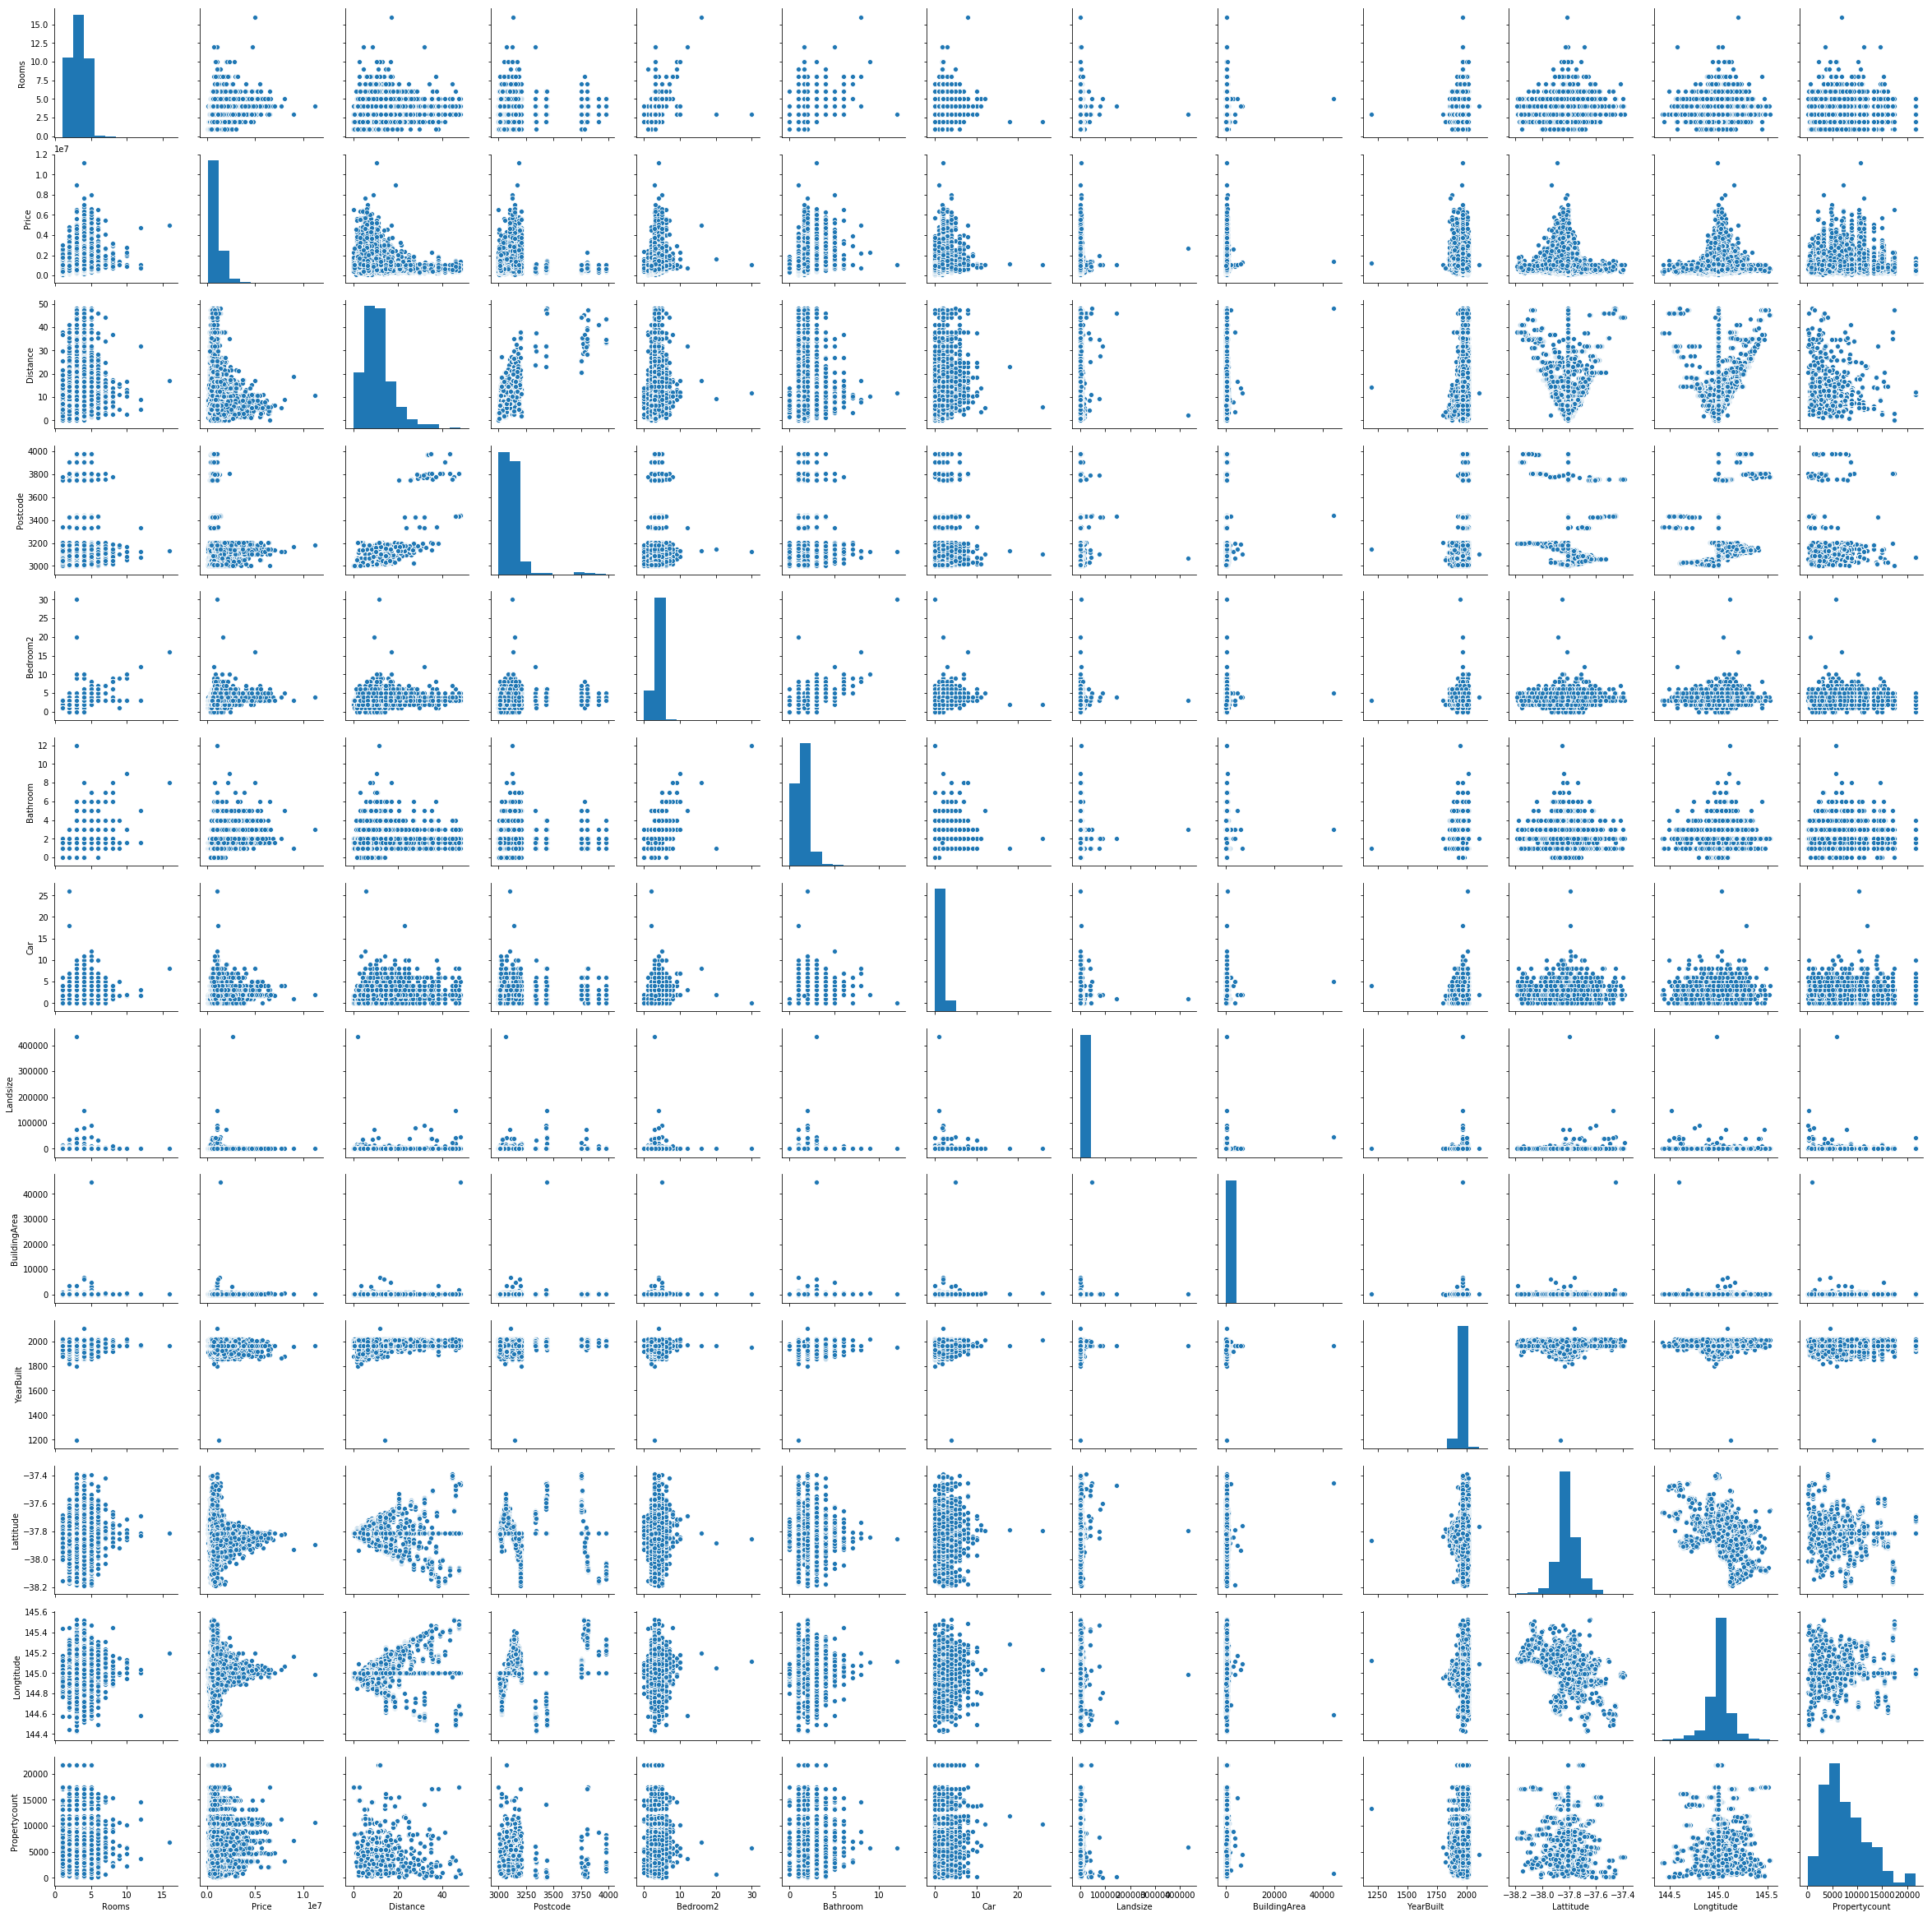

In [51]:
import seaborn as sns
sns.pairplot(df_new)

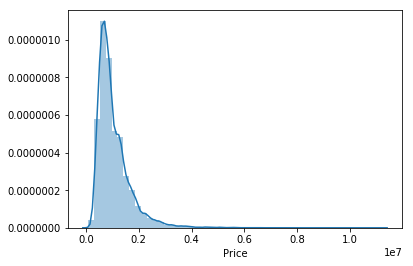

In [56]:
sns.distplot(df['Price'].dropna())

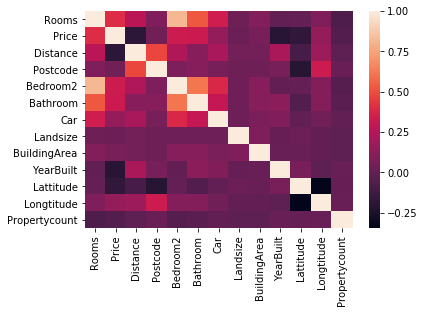

In [57]:
ax = sns.heatmap(df_new.corr())

<h3> Concatenate Object and Numeric Dataframes </h3>

In [14]:
df_dtype_merge = pd.concat([df.select_dtypes('object'),df_new],axis=1)


<h3> Get Dummy Variables for Suburbs </h3>

In [15]:
dummy = pd.get_dummies(df_dtype_merge['Suburb'])

In [16]:
dummy.head

<bound method NDFrame.head of        Abbotsford  Aberfeldie  Airport West  Albanvale  Albert Park  Albion  \
0               1           0             0          0            0       0   
1               1           0             0          0            0       0   
2               1           0             0          0            0       0   
3               1           0             0          0            0       0   
4               1           0             0          0            0       0   
5               1           0             0          0            0       0   
6               1           0             0          0            0       0   
7               1           0             0          0            0       0   
8               1           0             0          0            0       0   
9               1           0             0          0            0       0   
10              1           0             0          0            0       0   
11              1     

In [17]:
df_subdrop = df_dtype_merge.drop('Suburb',axis=1)

In [18]:
df_subdrop.head()

,Address,Type,Method,SellerG,Date,CouncilArea,Regionname,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan,2.0,1.050173e+06,2.5,3067.0,2.0,1.0,1.0,126.0,160.2564,1965.289885,-37.8014,144.9958,4019.0
1,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan,2.0,1.480000e+06,2.5,3067.0,2.0,1.0,1.0,202.0,160.2564,1965.289885,-37.7996,144.9984,4019.0
2,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan,2.0,1.035000e+06,2.5,3067.0,2.0,1.0,0.0,156.0,79.0000,1900.000000,-37.8079,144.9934,4019.0
3,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan,3.0,1.050173e+06,2.5,3067.0,3.0,2.0,1.0,0.0,160.2564,1965.289885,-37.8114,145.0116,4019.0
4,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan,3.0,1.465000e+06,2.5,3067.0,3.0,2.0,0.0,134.0,150.0000,1900.000000,-37.8093,144.9944,4019.0


<h3> Merge Suburb One-Hot Code with Imputed DataFrame </h3>

In [19]:
df_mergedummy = pd.concat([df_subdrop,dummy],axis=1)

In [20]:
df_mergedummy.head()

,Address,Type,Method,SellerG,Date,CouncilArea,Regionname,Rooms,Price,Distance,...,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarra Glen,Yarraville,croydon,viewbank
0,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan,2.0,1.050173e+06,2.5,...,0,0,0,0,0,0,0,0,0,0
1,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan,2.0,1.480000e+06,2.5,...,0,0,0,0,0,0,0,0,0,0
2,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan,2.0,1.035000e+06,2.5,...,0,0,0,0,0,0,0,0,0,0
3,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan,3.0,1.050173e+06,2.5,...,0,0,0,0,0,0,0,0,0,0
4,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan,3.0,1.465000e+06,2.5,...,0,0,0,0,0,0,0,0,0,0


<h3> Examine Correlations between columns and Price </h3>

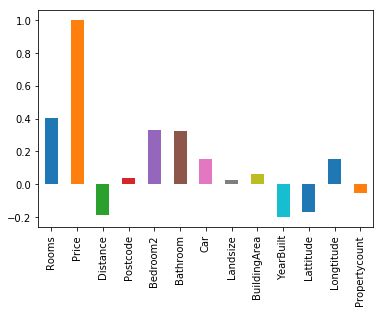

In [21]:
price_corr = df_mergedummy.corrwith(df_mergedummy.Price)
price_corr[df.select_dtypes(exclude=['object']).columns].plot.bar()

#f,axes = plt.subplots(1,2)
#price_corr[df.select_dtypes(exclude=['object']).columns].plot.bar(ax=axes[0])
plt.show()

<h2> Make Type into One-Hot Code </h2>

In [23]:
df_mergedummy.Type.unique()

array(['h', 'u', 't'], dtype=object)

In [24]:
df_dummytype = pd.get_dummies(df_mergedummy.Type)

In [63]:
df_mergedummydropna = df_mergedummy.drop('Type',axis=1)


<h3> Concatenate New Type One-Hot Code with Latest DataFrame </h3>

In [58]:
df_typesubdummy = pd.concat([df_mergedummydropna,df_dummytype],axis=1)

<h3> Create Correlation of DataFrame with Price Variable </h3>

In [65]:
price_corr_type = df_typesubdummy.corrwith(df_typesubdummy.Price)

<h3> Create Barplot of All Numeric Variables (added Type Variable) </h3>

C:\Users\clyde\Anaconda3\lib\site-packages\pandas\core\series.py:851: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


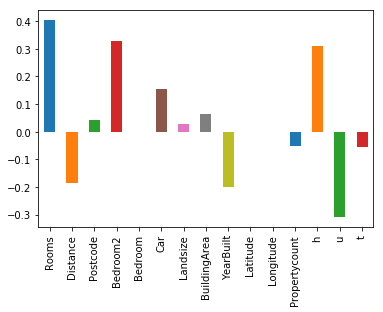

In [60]:
price_corr_type[['Rooms','Distance','Postcode','Bedroom2','Bedroom','Car','Landsize','BuildingArea','YearBuilt','Latitude','Longitude','Propertycount','h','u','t']].plot.bar()

In [30]:
df.Method.unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [31]:
dummy.describe()

,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,...,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarra Glen,Yarraville,croydon,viewbank
count,34857.00000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,...,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000
mean,0.00393,0.002295,0.004648,0.000402,0.003758,0.002037,0.002266,0.003500,0.000975,0.004791,...,0.000861,0.003787,0.001836,0.000086,0.002037,0.001434,0.000029,0.008721,0.000029,0.000029
std,0.06257,0.047853,0.068015,0.020037,0.061190,0.045087,0.047553,0.059058,0.031217,0.069052,...,0.029325,0.061422,0.042811,0.009277,0.045087,0.037847,0.005356,0.092981,0.005356,0.005356
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3> Add One-Hot Code for "Method" Variable </h3>

In [32]:
df_dummymethod = pd.get_dummies(df_mergedummydropna.Method)
df_mergedummymethod = df_mergedummydropna.drop('Method',axis=1)
df_mergedummymethod = pd.concat([df_mergedummymethod,df_dummymethod],axis=1)

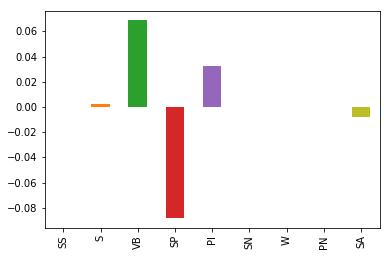

In [33]:
price_corr_method = df_mergedummymethod.corrwith(df_mergedummymethod.Price)
price_corr_method[df.Method.unique()].plot.bar()

In [34]:
df_final = df_mergedummymethod

In [371]:
y = df_final.Price
X = df_final.drop(['CouncilArea','Address','SellerG','Date','Postcode','Regionname'],axis=1)
X[df.Method.unique()].astype('int')
X[df.Suburb.unique()].astype('int')
X.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,viewbank,PI,PN,S,SA,SN,SP,SS,VB,W
0,2.0,13.864466,2.5,2.0,1.0,1.0,126.0,160.2564,1965.289885,-37.8014,...,0,0,0,0,0,0,0,1,0,0
1,2.0,14.207553,2.5,2.0,1.0,1.0,202.0,160.2564,1965.289885,-37.7996,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13.849912,2.5,2.0,1.0,0.0,156.0,79.0000,1900.000000,-37.8079,...,0,0,0,1,0,0,0,0,0,0
3,3.0,13.864466,2.5,3.0,2.0,1.0,0.0,160.2564,1965.289885,-37.8114,...,0,0,0,0,0,0,0,0,1,0
4,3.0,14.197366,2.5,3.0,2.0,0.0,134.0,150.0000,1900.000000,-37.8093,...,0,0,0,0,0,0,1,0,0,0


In [372]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = pd.DataFrame(X,columns = X.columns)
X = scaler.fit_transform(X)

C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [365]:
X_train.columns[360::]

Index(['croydon', 'viewbank', 'PI', 'PN', 'S'], dtype='object')

In [373]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=.5,random_state = 24)

In [380]:
#X_test = X_test.drop(['Address','SellerG','Date','Regionname','Postcode','CouncilArea','Price'],axis=1)
#X_train = X_train.drop(['Address','SellerG','Date','Regionname','Postcode','CouncilArea','Price'],axis=1)
X_test = X_test.drop(['viewbank','Price'],axis=1)
X_train = X_train.drop(['viewbank','Price'],axis=1)

In [389]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
lm = LinearRegression()
lm.fit(X_train,y_train)
lm1 = smf.OLS(y_train, X_train)
lm1model = lm1.fit()

In [390]:
lm1model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     56.03
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:16:34   Log-Likelihood:                -4566.2
No. Observations:               17428   AIC:                             9840.
Df Residuals:                   17074   BIC:                         1.259e+04
Df Model:                         353                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Rooms                  0.2521      0.004     56.926      0.000       0.243       0.261
Distance              -0.0377      0.004     -9.106      0.000      -0.046      -0.030
Bedroom2              -0.0482      0.005     -9.269      0.000      -0.058      -0.038
Bathroom               0.0337      0.005      6.574      0.000       0.024       0.044
Car                    0.0376      0.003     11.857      0.000       0.031       0.044
Landsize            6.221e-06   2.13e-06      2.922      0.003    2.05e-06    1.04e-05
BuildingArea           0.0002   3.02e-05      7.678      0.000       0.000       0.000
YearBuilt             -0.0022      0.000    -20.238      0.000      -0.002      -0.002
Lattitude             -0.0244      0.070     -0.349      0.727      -0.162       0.113
Longtitude            -0.1033      0.057     -1.800      0.072      -0.216       0.009
Propertycount          0.0001      0.000      0.595      0.552      -0.000       0.001
Abbotsford             0.6810      0.275      2.476      0.013       0.142       1.220
Aberfeldie             1.1501      0.785      1.465      0.143      -0.389       2.689
Airport West           0.7595      0.365      2.082      0.037       0.045       1.474
Albanvale              0.6901      0.714      0.967      0.334      -0.709       2.089
Albert Park            1.1540      0.406      2.842      0.004       0.358       1.950
Albion                 0.7789      0.638      1.220      0.222      -0.473       2.030
Alphington             1.1323      0.637      1.777      0.076      -0.117       2.382
Altona                 0.6452      0.240      2.686      0.007       0.174       1.116
Altona Meadows         0.1553      0.713      0.218      0.828      -1.242       1.552
Altona North           0.4997      0.223      2.244      0.025       0.063       0.936
Ardeer                 0.9605      0.845      1.136      0.256      -0.697       2.618
Armadale               0.8439      0.211      3.992      0.000       0.430       1.258
Ascot Vale             0.3058      0.478      0.640      0.522      -0.631       1.243
Ashburton              1.2489      0.453      2.760      0.006       0.362       2.136
Ashwood                1.0908      0.486      2.243      0.025       0.137       2.044
Aspendale              1.4713      0.504      2.919      0.004       0.483       2.459
Aspendale Gardens      1.3349      0.637      2.096      0.036       0.086       2.583
Attwood                1.1529      0.884      1.304      0.192      -0.580       2.885
Avondale Heights       0.5758      0.210      2.741      0.006       0.164       0.988
Avonsleigh          -2.05e-12   6.68e-13     -3.067      0.002   -3.36e-12    -7.4e-13
Bacchus Marsh          1.4651      0.533      2.750      0.006       0.421       2.509
Balaclava              0.8506      0.4

In [330]:
predictions = lm.predict(X_test)

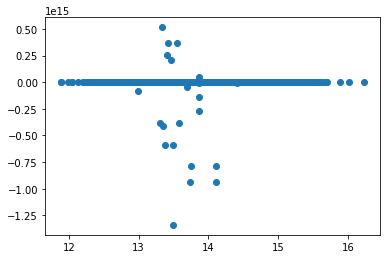

In [331]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
ridgeregr = linear_model.Ridge(alpha=1, fit_intercept=False) 
result = ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_test, y_test))

In [ ]:
lassBig = linear_model.Lasso(alpha=.35,fit_intercept=False)
lassBig.fit(X_train, y_train)

In [ ]:
# Storing legend information.
lasso =[]
ridge = []

#Run the model for many alphas.
for lambd in range(1, 50, 1):
    lassBig = linear_model.Lasso(alpha=lambd,fit_intercept=False)
    lassBig.fit(X_train, y_train)
    lassBig_score = lassBig.score(X_test, y_test)
    lasso = np.append(lasso,lassBig_score)
    
    ridgeregr = linear_model.Ridge(alpha=lambd,fit_intercept=False) 
    ridgeregr.fit(X_train, y_train)
    ridgeBig_score = ridgeregr.score(X_test, y_test)
    ridge = np.append(ridge,ridgeBig_score)


In [ ]:
plt.plot(lasso)
plt.show()

In [ ]:
plt.plot(ridge)
plt.show()

In [391]:
lm1_pred = lm1model.predict(X_test)

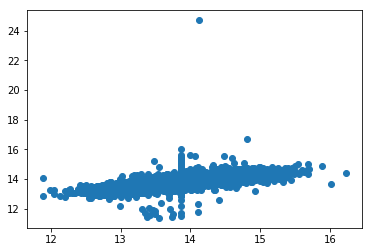

In [392]:
plt.scatter(y_test,lm1_pred)

In [344]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lm1_pred)

573540.2296155324

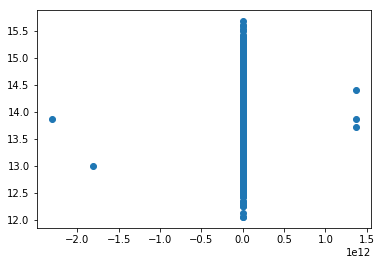

In [208]:
plt.scatter(lm1_pred,y_test)

(array([1]), <a list of 1 Text xticklabel objects>)

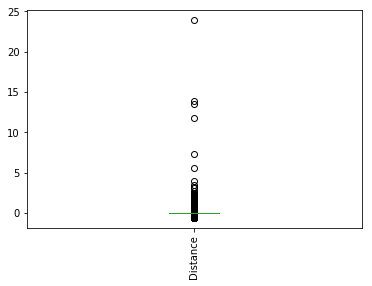

In [251]:
X_train.loc[:][X_train.columns[1]].plot.box()
plt.xticks(rotation='vertical')

In [252]:
X_train.loc[:][X_train.columns[0:10]].describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,1.742800e+04,1.742800e+04,1.742800e+04,1.742800e+04,17428.000000,17428.000000,17428.000000,17428.000000,17428.000000,17428.000000
mean,-3.062337e-03,-2.307744e-03,-1.095063e-02,-2.855497e-03,-0.013286,-0.006876,-0.003596,0.008438,-0.005727,0.007035
std,9.841388e-01,3.405874e-01,1.004467e+00,1.003502e+00,0.995496,0.943913,0.961894,1.059672,0.845239,1.055518
min,-1.975583e+00,-6.360887e-01,-4.790647e+00,-5.403681e+00,-1.691546,-0.062816,-0.047962,-0.068332,-0.020045,-0.061420
25%,-8.328650e-01,-1.017703e-03,-4.650146e-01,-3.689704e-01,-0.721094,-0.062816,-0.047962,-0.068332,-0.020045,-0.061420
50%,2.216647e-17,2.903096e-17,6.607625e-14,-6.403886e-14,-0.227174,-0.062816,-0.047962,-0.068332,-0.020045,-0.061420
75%,3.098534e-01,2.903096e-17,4.961528e-01,4.778790e-01,0.622903,-0.062816,-0.047962,-0.068332,-0.020045,-0.061420
max,1.173704e+01,2.388559e+01,5.085791e+00,4.554393e+00,3.179230,15.919506,20.849760,14.634434,49.887731,16.281399


In [260]:
X_new.Distance.unique()

array([ 2.90309569e-17, -3.22522415e-01, -4.07096425e-02, -7.24631943e-02,
        2.37133936e-01,  1.97441996e-01, -3.10614833e-01, -5.26172244e-02,
       -2.11384983e-01, -3.38399191e-01, -3.18553221e-01,  1.18058116e-01,
       -2.62984505e-01, -2.51076923e-01, -1.24062716e-01, -1.99477401e-01,
       -2.19323371e-01, -3.46337578e-01, -1.00247552e-01,  2.67666551e-02,
       -5.28920501e-01, -3.97937100e-01, -2.98707251e-01,  5.45510129e-02,
       -4.37629040e-01, -1.28031910e-01, -5.64643247e-01, -1.43908686e-01,
       -2.74892087e-01, -3.14584027e-01,  2.56979906e-01, -6.05556124e-02,
       -1.83600626e-01, -3.02676445e-01, -1.04216746e-01, -1.75662238e-01,
       -2.94738057e-01, -1.32001104e-01,  1.02181341e-01, -2.78861281e-01,
       -1.08185940e-01, -1.20093522e-01, -1.87569820e-01, -2.39169341e-01,
        5.90392199e-01,  1.25996504e-01, -1.35970298e-01, -2.35200147e-01,
       -2.31230953e-01, -3.34429997e-01, -5.65864184e-02,  1.49811668e-01,
        7.83661767e-02, -

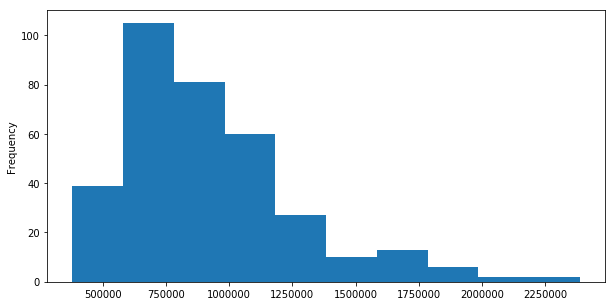

In [307]:
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
df.groupby('Suburb')['Price'].mean().plot.hist()

C:\Users\clyde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


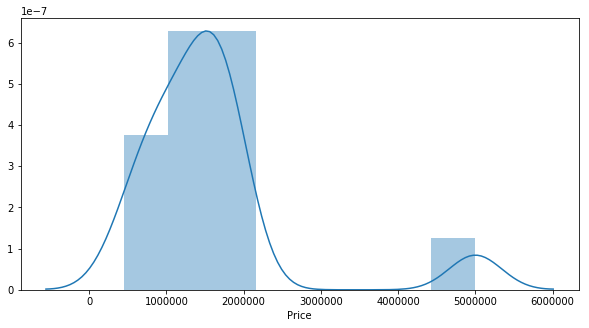

In [283]:
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
sns.distplot(df.groupby('Bedroom2')['Price'].mean().dropna())

C:\Users\clyde\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


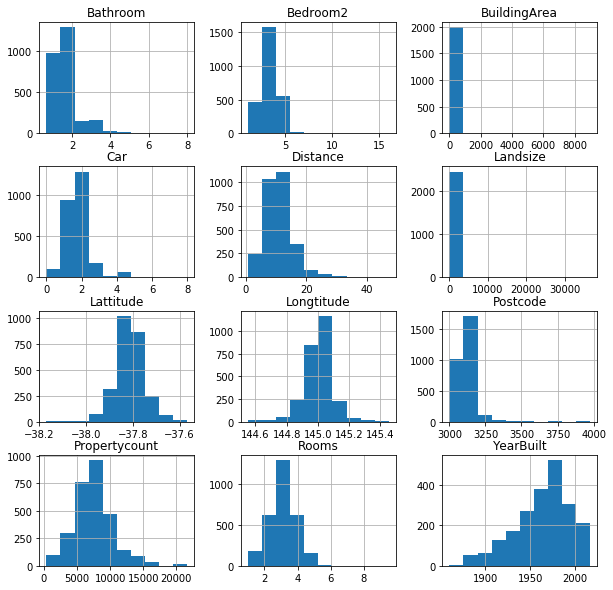

In [293]:
fig, ax = plt.subplots(figsize=(10,10))  
df.groupby(['Price']).mean().hist(ax=ax)
plt.show()

In [297]:
df.groupby('Bedroom2').groups.keys()

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 16.0, 20.0, 30.0])

In [300]:
df.groupby('Bedroom2')['Price'].mean()

Bedroom2
0.0     1.030219e+06
1.0     4.479144e+05
2.0     8.051044e+05
3.0     1.051235e+06
4.0     1.376509e+06
5.0     1.833629e+06
6.0     1.902209e+06
7.0     1.797553e+06
8.0     1.332224e+06
9.0     1.487000e+06
10.0    1.603750e+06
12.0    7.100000e+05
16.0    5.000000e+06
20.0    1.650000e+06
30.0             NaN
Name: Price, dtype: float64

In [308]:
df.groupby(['Suburb'])['Price'].mean()

Suburb
Abbotsford            1.033549e+06
Aberfeldie            1.307193e+06
Airport West          7.513642e+05
Albanvale             5.360556e+05
Albert Park           1.927651e+06
Albion                6.151237e+05
Alphington            1.397532e+06
Altona                8.841555e+05
Altona Meadows        6.535577e+05
Altona North          7.897133e+05
Ardeer                6.271087e+05
Armadale              1.592298e+06
Ascot Vale            1.054412e+06
Ashburton             1.660385e+06
Ashwood               1.173157e+06
Aspendale             1.093393e+06
Aspendale Gardens     9.195156e+05
Attwood               8.075385e+05
Avondale Heights      8.494595e+05
Avonsleigh                     NaN
Bacchus Marsh         4.230000e+05
Balaclava             8.204519e+05
Balwyn                1.893712e+06
Balwyn North          1.786109e+06
Bayswater             7.404118e+05
Bayswater North       7.405778e+05
Beaconsfield          6.035000e+05
Beaconsfield Upper    7.195000e+05
Beaumaris    

In [305]:
df.groupby('Price').mean()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Price,,,,,,,,,,,,
85000.0,1.00,6.400000,3011.000000,1.000000,1.0,0.00,0.000000,NaN,2007.000000,-37.791100,144.890000,7570.000000
112000.0,1.00,8.400000,3145.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8801.000000
121000.0,1.00,1.300000,3002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3040.000000
131000.0,4.00,8.900000,3162.000000,4.000000,1.0,2.00,499.000000,155.000000,1920.000000,-37.886400,145.024200,2379.000000
145000.0,2.50,10.850000,3039.000000,2.500000,1.0,1.00,286.000000,164.000000,1910.000000,-37.769400,144.896200,6694.500000
160000.0,1.00,4.600000,3122.000000,1.000000,1.0,0.00,322.000000,NaN,2009.000000,-37.819800,145.037300,11308.000000
170000.0,1.00,5.150000,3033.500000,1.000000,1.0,0.00,640.000000,26.000000,2013.000000,-37.789130,144.923875,9744.000000
185000.0,1.00,11.050000,3016.000000,1.000000,1.0,1.00,1173.500000,43.000000,1975.000000,-37.791600,144.847200,3621.500000
190000.0,2.00,13.900000,3020.000000,2.000000,1.0,1.00,0.000000,NaN,NaN,-37.783900,144.823900,2185.000000


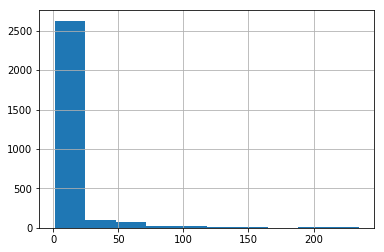

In [311]:
df.groupby('Price')['Suburb'].count().hist()

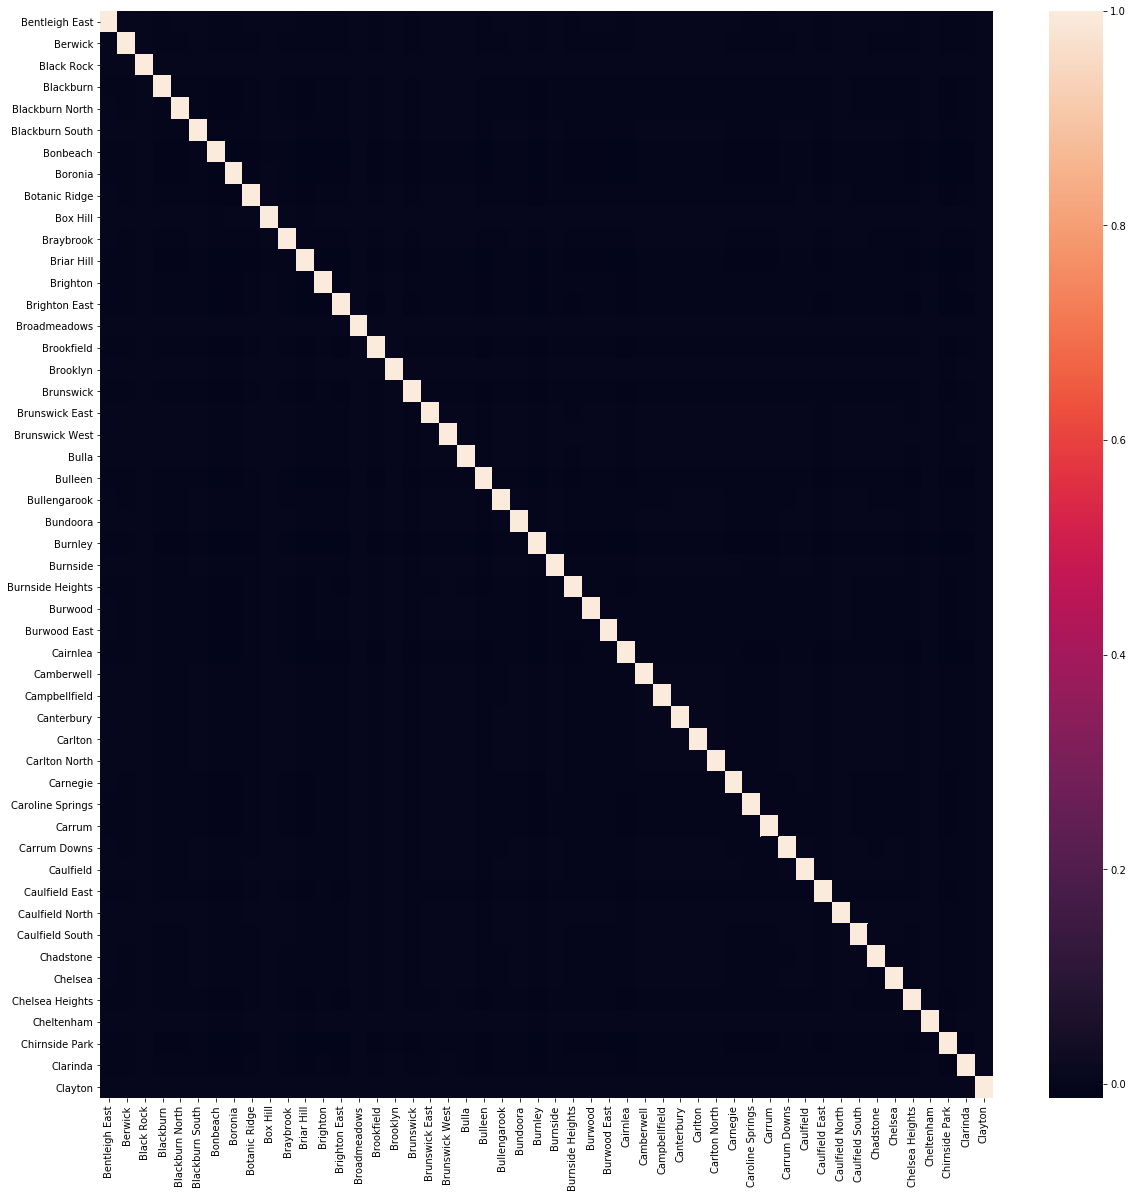

In [329]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(X_new.loc[:][X_new.columns[50:100]].corr())

In [350]:
X_new.SN

AttributeError: 'DataFrame' object has no attribute 'SN'